In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score

***
가우시안 혼합 모델(Gaussian Mixture Model)
***
전체 집단 내부에 속한 하위 집단의 존재를 가정한 확률 모델이다.  
전체 집단의 확률 분포가 가우시안 분포를 따르는 경우 흔히 정규 분포를 가우시안 분포라 부른다.  
또한, 가우시안 혼합 모델은 비지도 학습의 한 종류로 클러스터링에 사용된다.

***
가우시안 혼합 모델 클러스터링 알고리즘을 활용하여 주어진 데이터를 클러스터링 해본다.
***
데이터 불러오기

In [2]:
# 클러스터링용 가상 데이터를 불러온다.
x_train, y_train = datasets.make_blobs(n_samples=100, n_features=2, random_state=10, centers=6) 
print(x_train.shape, y_train.shape)

(100, 2) (100,)


***
클러스터링 되지 않은 데이터 시각화
***

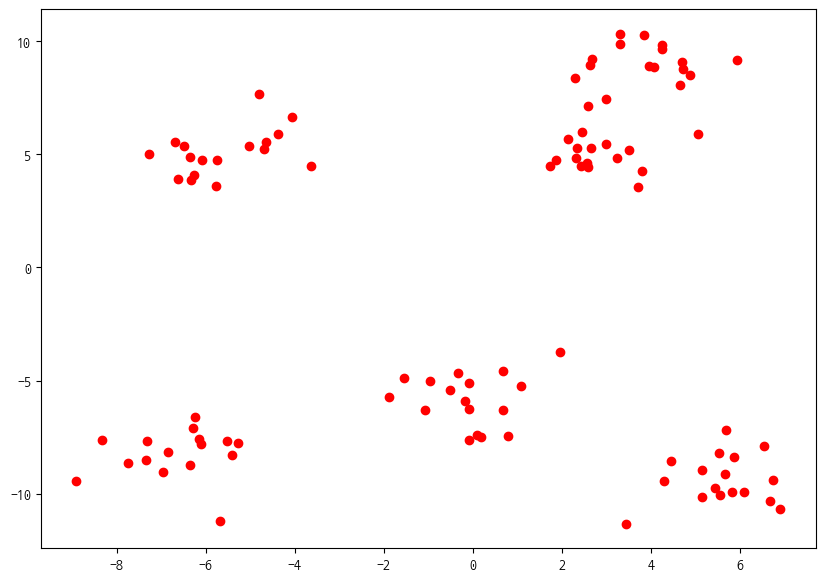

In [3]:
# 클러스터링되지 않은 데이터 시각화
plt.figure(figsize=[10, 7])
plt.scatter(x=x_train[: , 0], y=x_train[:, 1], c="red")
plt.show()

***
가우시안 혼합 클러스터링 모델을 생성 후 학습시킨다.
***

In [4]:
# 가우시안 혼합 클러스터링 모델 알고리즘 사용
from sklearn.mixture import GaussianMixture

# n_components 속성에 클러스터링 갯수를 지정해서 가우시안 혼합 클러스터링 모델을 만든다. 기본값 -> 1
cluster = GaussianMixture(n_components=6, random_state=0)

#학습데이터로 가우시안 혼합 클러스터링 모델을 학습시킨다.
cluster.fit(x_train)

GaussianMixture(n_components=6, random_state=0)

In [5]:
# 클러스터링 결과(레이블)를 확인한다.
#fit_predict() 메소드에 피쳐 데이터를 넘겨서 클러스터링 결과를 확인할 수 있다. 
print(cluster.fit_predict(x_train))

[4 1 2 2 0 2 3 3 0 4 5 2 0 4 0 2 1 3 0 3 3 2 4 2 2 2 4 5 0 3 3 4 4 0 4 4 1
 5 4 5 3 3 5 3 0 5 5 4 0 1 0 1 0 4 5 0 0 4 1 3 2 1 1 3 4 2 1 1 1 0 5 5 2 3
 0 2 4 4 5 3 4 2 2 0 0 5 3 1 5 3 5 3 5 1 5 2 1 1 1 5]


***
실제 데이터의 레이블 데이터 시각화
***

In [6]:
# 클러스터링된 데이터 시각화를 위해 데이터 프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df["label"] = y_train
x_train_df["cluster"] = cluster.fit_predict(x_train) # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,-6.086784,4.729827,3,4
1,3.801750,4.278268,1,1
2,-7.330583,-8.494063,4,2
3,-6.107069,-7.818906,4,2
4,5.525562,-8.186965,0,0
...,...,...,...,...
95,-6.950884,-9.024594,4,2
96,2.591843,4.446782,1,1
97,2.992321,5.436981,1,1
98,2.310466,4.854172,1,1


In [7]:
# 레이블과 클러스터링된 레이블의 종류 확인
print(set(x_train_df.label))
print(set(x_train_df.cluster))

{0, 1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5}


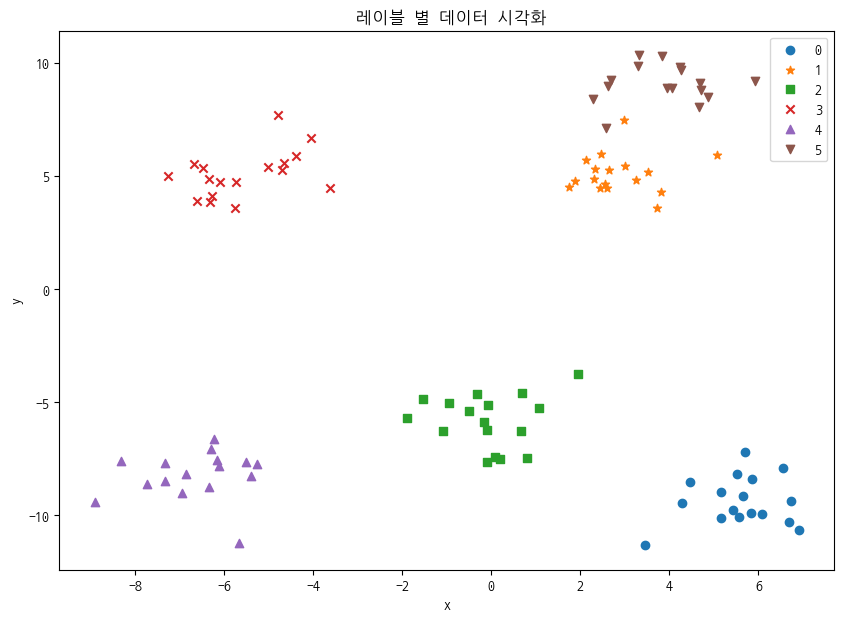

In [8]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s", "x", "^", "v"]

for i in set(x_train_df.label):
     df_index = x_train_df[x_train_df.label == i] # 원 데이터의 레이블 데이터를 분할한다.
     X = df_index.x # 학습 데이터의 첫번째 성분 벡터를 추출한다.
     Y = df_index.y # 학습 데이터의 두번째 성분 벡터를 추출한다.
     plt.scatter(x=X, y=Y, marker = markers[i], label= i ) # 산포도를 그린다.

plt.title(" 레이블 별 데이터 시각화")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

***
가우시안 혼합 모델 클러스터링 된 결과 데이터 시각화
***

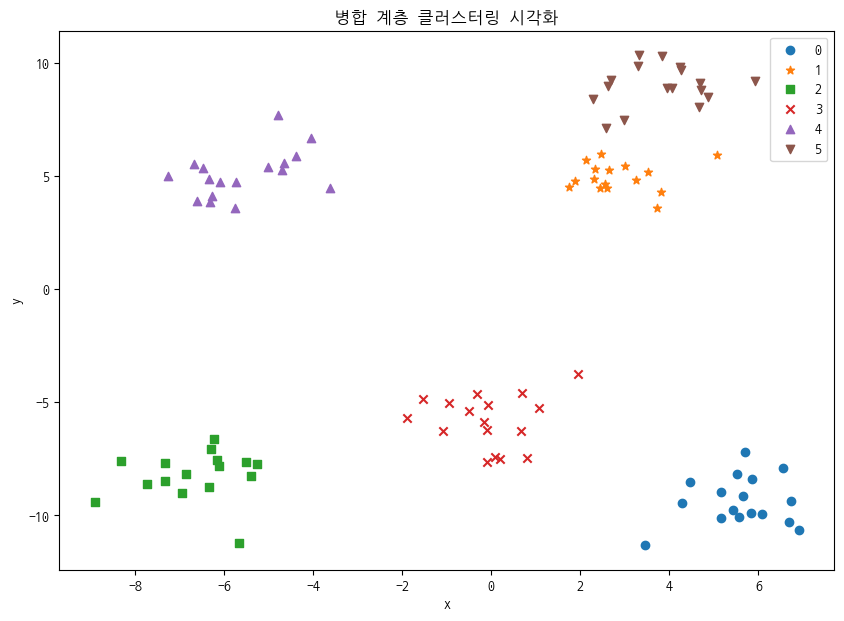

In [9]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s", "x", "^", "v"]

for i in set(x_train_df.cluster):
     df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과별로 데이터를 분할한다.
     X = df_index.x # 클러스터링 결과에서 첫번째 성분 벡터를 추출한다.
     Y = df_index.y # 클러스터링 결과에서 두번째 성분 벡터를 추출한다.
     plt.scatter(x=X, y=Y, marker = markers[i], label=i ) # 산포도를 그린다.

plt.title("병합 계층 클러스터링 시각화")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

***
학습된 모델을 평가한다.
***

In [10]:
# silhouette_score() 메소드에 피쳐 데이터와 군집화 결과로 얻은 클러스터를 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(x_train, cluster.fit_predict(x_train))
print(sil_score)

0.7000819727948289
